# Heisenbergin epätarkkuusperiaate

## ELEC-C3220 Kvantti-ilmiöt kevät 2018

Tässä työkirjassa tutkitaan miten kvanttimekaanista hiukkasta kuvaavan aineaallon kuvaama sijainnin epämääräisyys $\Delta x$ ja sen aineaallonpituuden epämääräisyys $\Delta p_x = \hbar \Delta k_x$ kytkeytyvät toisiinsa. Molemmat epämääräisyydet ovat suureidensa standardipoikkeamia.

This workbook written by Sami Kujala 2018.

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons -lisenssi" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a><br />Tämä teos on lisensoitu <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Nimeä-JaaSamoin 4.0 Kansainvälinen -lisenssillä</a>.

## Pohjat kohdalleen

Tehdään hiukan pohjakoodailua että saadaan homma toimimaan

In [1]:
# Pandas on data science -maailman de facto datan käsittely -kirjasto
# https://pandas.pydata.org/
import pandas as pd 

# Numpy on Pythonin numeerinen kirjasto
# https://numpy.org
import numpy as np

In [2]:
# Jupyter-työkirjan komento, jolla plottaukset saadaan osaksi työkirjaa 
%matplotlib inline

In [3]:
# Tutkittavan alueen rajat $x$-avaruudessa 
# Yksikkönä vaikkapa nanometri, jolloin tutkimusalue 1 mikrometri
studyarea_extents = (-500, 500)

# Jaetaan $x$-avaruus 10000 osaan, vrt. Matlab
x = np.linspace(*studyarea_extents, 10000)

# Askeleen koko $x$-avaruudessa 
spacestep = np.diff(x)[0]

# Aallonpituus [nanometriä]
wavelength = 1

# Aaltoluku [1/nanometriä]
k0 = 2 * np.pi / wavelength

# Hiukkaselle rajattu alue [nm]
epsilon = 5

Rakennetaan tässä Pandas DataFrame-olioon simulaatiot hiukkasesta.

- x-alkiossa $x$-avaruus
- y1-alkiossa hiukkanen on "kaikkialla"
- y2-alkiossa hiukkanen on lokalisoitu $-10\epsilon$ < x < $10\epsilon$ katkaisemalla siniaalto
- y3-alkiossa hiukkanen on lokalisoitu $-\epsilon$ < x < $\epsilon$ katkaisemalla siniaalto
- y4-alkiossa hiukkanen on lokalisoitu $-\epsilon$ < x < $\epsilon$ moduloimalla siniaaltoa gaussin funktiolla
- y5-alkiossa hiukkanen on lokalisoitu $-\epsilon/10$ < x < $\epsilon/10$ moduloimalla siniaaltoa gaussin funktiolla

In [4]:
# Huomaa, että aaltomuodoista otetaan itseisarvon neliö **2 -operaattorilla, koska tutkitaan hiukkasen 
# todennäköisyystiheyttä. Aaltomuoto itsessään on todennäköisyysamplitudi ja yleisessä tapauksessa kompleksinen
data = pd.DataFrame({
  "x": x,                     
  "y1": np.sin(k0*x)**2, 
  "y2": np.piecewise(x, [x < -10*epsilon, (x >= -10*epsilon) & (x <= 10*epsilon), x > 10*epsilon], [lambda x: 0, lambda x: np.sin(k0*x)**2, lambda x: 0]),                     
  "y3": np.piecewise(x, [x < -epsilon, (x >= -epsilon) & (x <= epsilon), x > epsilon], [lambda x: 0, lambda x: np.sin(k0*x)**2, lambda x: 0]),
  "y4": (np.sin(k0*x) * np.exp(-x**2 / (2*epsilon)**2))**2,
  "y5": (np.sin(k0*x) * np.exp(-x**2 / (2*epsilon/10)**2))**2,
})

## Plotataan hiukkanen eri tapauksissa

Epämääräisyys hiukkasen sijainnissa $\Delta x$ on verrannollinen "pulssin" leveyteen. Täsmällisesti ottaen Heisenbergin epätarkkuusperiaatteessa pulssin leveydeksi otetaan on pulssin leveyden standardipoikkeama.

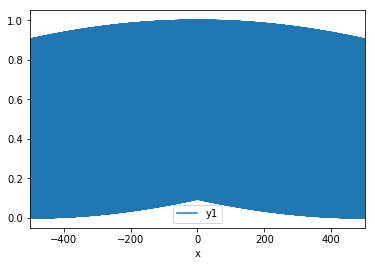

In [5]:
data.plot('x', 'y1')

Menee hiukan puuroksi tiukan näytteistyksen takia. Aaltoa pitäisi olla koko plottausalueella.

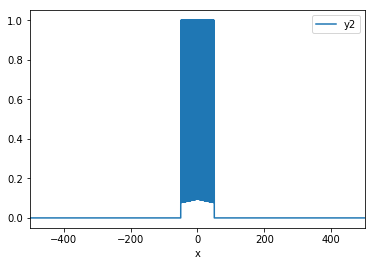

In [6]:
data.plot('x', 'y2')

Aalto lokalisoituu hieman.

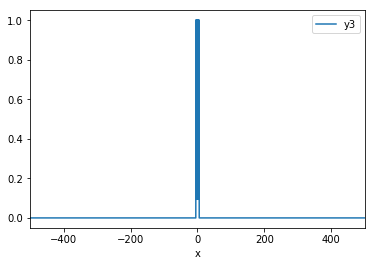

In [7]:
data.plot('x', 'y3')

Aalto lokalisoituu hieman enemmän.

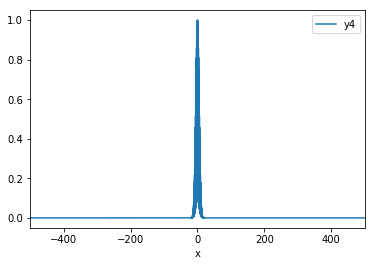

In [8]:
data.plot('x', 'y4')

Aalto lokalisoituu gaussin kellokäyrän mukaisesti.

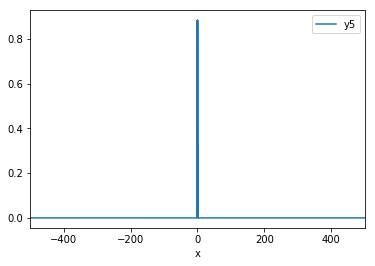

In [9]:
data.plot('x', 'y5')

Aalto lokalisoituu gaussin kellokäyrän mukaisesti todella pienelle alueelle.

Hiukkanen saatiin lokalisoitua eri tavoin.  Tutkitaan seuraavaksi mitä merkitystä lokalisaatiolla on hiukkasen aaltoluvun kanssa.

In [10]:
# Lasketaan jokaisen aaltomuodon Fourier-spektri FFT-operaatiolla (Fast Fourier Transform)
# Koska nyt työskennellään numeerisesti ja sen takia näytteistetyn signaalin kanssa, 
# ei voida työskennellä signaalien jatkuvan Fourier-muunnoksen kanssa.
#
# FFT-muunnettu signaali jaetaan signaalin pituudella spektrin suuruuden normalisoimiseksi. 
# Johtuu taustalla olevasta numeerisesta kirjastosta.
fft1 = np.fft.fft(data['y1'])/len(x)
fft2 = np.fft.fft(data['y2'])/len(x)
fft3 = np.fft.fft(data['y3'])/len(x)
fft4 = np.fft.fft(data['y4'])/len(x)
fft5 = np.fft.fft(data['y5'])/len(x)

In [11]:
# Muutetaan $x$-avaruuden jaottelu aaltoluku-avaruuteen, eli ns. $k$-avaruuteen
k_sig = np.fft.fftfreq(x.size, spacestep)

# FFT pilkkoo signaalin negatiivisiin ja positiivisiin taajuuksiin. Signaalin rekonstruoimiseksi
# tarvitaan molemmat, mutta visualisoimiseksi ei tarvita.
# Lisätietoa negatiivisista taajuuksista 
# https://dsp.stackexchange.com/questions/431/what-is-the-physical-significance-of-negative-frequencies
#
# valitaan idx-muuttujaan vain positiiviset taajuudet
idx = np.where(k_sig >= 0)

In [12]:
k_sig = k_sig[idx]
fft1 = fft1[idx]
fft2 = fft2[idx]
fft3 = fft3[idx]
fft4 = fft4[idx]
fft5 = fft5[idx]

# Tallennetaan lasketut muunnokset ja $k$-avaruus uuteen DataFrameen
# Hiukan tårta på tårtan, mutta tulipahan tehtyä
fft = pd.DataFrame({
    "k": k_sig, 
    "FFT1": np.abs((fft1)),
    "FFT2": np.abs((fft2)),
    "FFT3": np.abs((fft3)),
    "FFT4": np.abs((fft4)),
    "FFT5": np.abs((fft5))
})

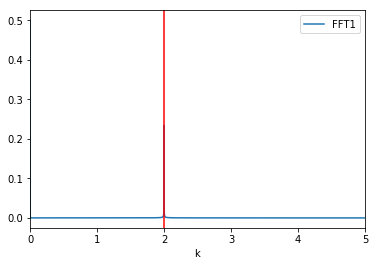

In [13]:
# Plotataan.
# 
# Jokaiseen plottiin lisätään pystyviiva keskiaaltoluvun ympärille
#
fft.plot('k', 'FFT1').axvline(x=k0/np.pi, color='r', linestyle='-')

$k$-avaruudessa aaltoa vastaa yksi piikki. Sopii Heisenbergiin, koska jos $\Delta x \sim \infty$, niin $\Delta p_x \sim 1$

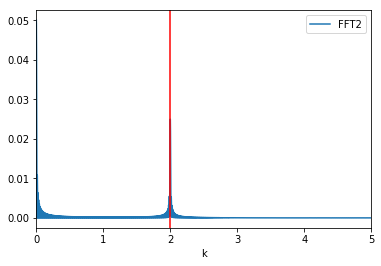

In [14]:
fft.plot('k', 'FFT2').axvline(x=k0/np.pi, color='r', linestyle='-')

$k$-avaruudessa aallon aaltolukujakauma $\Delta k$ kasvaa hiukkasen lokalisaation parantuessa ($\Delta x$) pienenee.

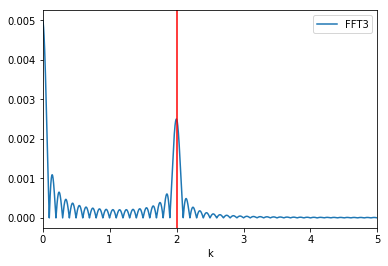

In [15]:
fft.plot('k', 'FFT3').axvline(x=k0/np.pi, color='r', linestyle='-')

$k$-avaruudessa aallon aaltolukujakauma $\Delta k$ kasvaa hiukkasen lokalisaation parantuessa entisestään.

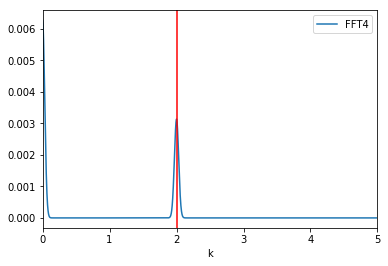

In [16]:
fft.plot('k', 'FFT4').axvline(x=k0/np.pi, color='r', linestyle='-')

$x$-avaruudessa aallon leveys on jotakuinkin sama kuin edellisessä kuvassa, mutta aallon aaltolukujakauma "siistiytyy".

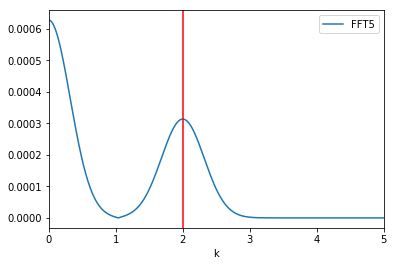

In [17]:
fft.plot('k', 'FFT5').axvline(x=k0/np.pi, color='r', linestyle='-')

Tiukasti gaussin käyrällä $x$-avaruudessa lokalisoitu aalto on hyvin leveä $k$-avaruudessa.

# Valmista tuli!

Tehtäviä sinulle!
1. Miten epämääräisyys hiukkasen aaltoluvussa suhteutuu epämääräisyyteen hiukkasen sijainnissa?
1. Miksi spektrissä on piikki myös aaltoluvun nolla kohdalla?
1. Bonus: Miksi gaussinen modulaatio tuottaa "siistimmän" aaltolukujakauman kuin katkaistu sinikäyrä?  
